In [1]:
# dropping constant features
#in this step we will be removing the features witch have constant features which are actually not importtant for solving the problem statement

In [2]:
import pandas as pd

In [3]:
data=pd.DataFrame({'A':[1,2,3,4,5,6],
                   'B':[4,5,6,7,8,9],
                  'C':[0,0,0,0,0,0],
                   'D':[1,1,1,1,1,1]}
                  
                 )

In [4]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,3,6,0,1
3,4,7,0,1
4,5,8,0,1


In [5]:
## it will zero variance featuress
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [6]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,3,6,0,1
3,4,7,0,1
4,5,8,0,1


In [7]:
var_thres.get_support()

array([ True,  True, False, False])

In [8]:
 data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [9]:
constant_columns=[column for column in data.columns if column not in data.columns[var_thres.get_support()]]

In [10]:
len(constant_columns)

2

In [11]:
for feature in constant_columns:
    print(feature)

C
D


In [12]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8
5,6,9


In [13]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,3,6,0,1
3,4,7,0,1
4,5,8,0,1


In [14]:
# lets practice on bigger dataset

In [15]:
import pandas as pd
from sklearn.feature_selection import variance_threshold

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.variance_threshold module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
import seaborn as sns

In [17]:
data=pd.read_csv('santander.csv')

In [18]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [19]:
data.shape

(76020, 371)

In [20]:
X=data.drop('TARGET',axis=1) # threshold apply only for independent features
y=data['TARGET']

In [21]:
X.shape

(76020, 370)

In [22]:
y.shape

(76020,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [25]:
X_train.shape

(53214, 370)

In [26]:
X_test.shape

(22806, 370)

In [27]:
# lets apply variance threshold

In [28]:
from sklearn.feature_selection import VarianceThreshold

In [29]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [30]:
### finding non constant features

In [31]:
sum(var_thres.get_support())

323

In [32]:
constant_columns=[column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [33]:
len(constant_columns)

47

In [34]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var28
saldo_var27
saldo_var41
saldo_var46
delta_imp_reemb_var33_1y3
delta_num_reemb_var33_1y3
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_meses_var13_medio_ult3
num_reemb_var13_hace3
num_reemb_var33_hace3
num_reemb_var33_ult1
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace2
saldo_medio_var13_medio_hace3
saldo_medio_var13_medio_ult1
saldo_medio_var13_medio_ult3


In [35]:
X_train=X_train.drop(constant_columns,axis=1)

In [36]:
X_train.shape

(53214, 323)

In [37]:
# loading the dataset

In [38]:
from sklearn.datasets import load_boston

In [39]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MEDV']=data.target

In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
# feature matrax

In [43]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [44]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
# separate dataset in train and test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [48]:
X_train.shape

(354, 13)

In [49]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.207919,0.397808,-0.066220,0.405165,-0.229191,0.356441,-0.377906,0.612784,0.569329,0.299647,-0.408824,0.456031
ZN,-0.207919,1.000000,-0.551637,-0.042750,-0.527432,0.304228,-0.594796,0.688549,-0.340189,-0.336954,-0.368046,0.185156,-0.412700
INDUS,0.397808,-0.551637,1.000000,0.067972,0.756122,-0.393783,0.653934,-0.706117,0.603178,0.739938,0.378667,-0.349566,0.604891
CHAS,-0.066220,-0.042750,0.067972,1.000000,0.102157,0.085898,0.085334,-0.097864,-0.000570,-0.028213,-0.117231,0.080234,-0.075431
NOX,0.405165,-0.527432,0.756122,0.102157,1.000000,-0.298668,0.740174,-0.777394,0.620462,0.671874,0.173177,-0.352196,0.595930
RM,-0.229191,0.304228,-0.393783,0.085898,-0.298668,1.000000,-0.246195,0.210722,-0.221785,-0.298268,-0.368268,0.101346,-0.620978
AGE,0.356441,-0.594796,0.653934,0.085334,0.740174,-0.246195,1.000000,-0.782489,0.484163,0.529949,0.231110,-0.291112,0.584440
DIS,-0.377906,0.688549,-0.706117,-0.097864,-0.777394,0.210722,-0.782489,1.000000,-0.511654,-0.552556,-0.189411,0.295103,-0.517146
RAD,0.612784,-0.340189,0.603178,-0.000570,0.620462,-0.221785,0.484163,-0.511654,1.000000,0.911081,0.492981,-0.479170,0.515070
TAX,0.569329,-0.336954,0.739938,-0.028213,0.671874,-0.298268,0.529949,-0.552556,0.911081,1.000000,0.496558,-0.465660,0.565182


In [50]:
#using pearson Correlation

In [51]:
import matplotlib.pyplot as plt

<AxesSubplot:>

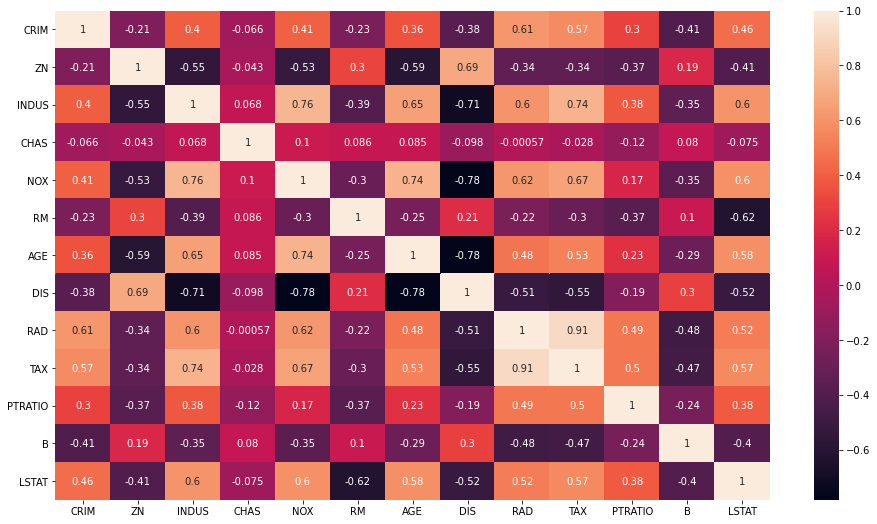

In [52]:
plt.figure(figsize=(16,9))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [53]:
# with the following function we can select highly correlated feature
# it will remove the first feature that is correlated with anything other feature

In [ ]:
def correlation(dataset,threshold):
    col_corr=set()# set of all names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])> threshold: # we are interested in absolute coeff values
                col_name=corr_matrix.columns[i] # getting the name of column
                col_corr.add(col_name)
                
    return col_corr 

In [61]:
correlated_feature=correlation(X_train,0.7) # it consider negative value also

In [62]:
correlated_feature

{'AGE', 'NOX', 'TAX'}

In [63]:
X_train.drop(correlated_feature,axis=1,inplace=True)
X_test.drop(correlated_feature,axis=1,inplace=True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
196,0.04011,80.0,1.52,0.0,7.287,7.3090,2.0,12.6,396.90,4.08
334,0.03738,0.0,5.19,0.0,6.310,6.4584,5.0,20.2,389.40,6.75
470,4.34879,0.0,18.10,0.0,6.167,3.0334,24.0,20.2,396.90,16.29
149,2.73397,0.0,19.58,0.0,5.597,1.5257,5.0,14.7,351.85,21.45
178,0.06642,0.0,4.05,0.0,6.860,2.9153,5.0,16.6,391.27,6.92


In [65]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
24,0.75026,0.0,8.14,0.0,5.924,4.3996,4.0,21.0,394.33,16.30
10,0.22489,12.5,7.87,0.0,6.377,6.3467,5.0,15.2,392.52,20.45
205,0.13642,0.0,10.59,0.0,5.891,3.9454,4.0,18.6,396.90,10.87
120,0.06899,0.0,25.65,0.0,5.870,2.2577,2.0,19.1,389.15,14.37
175,0.06664,0.0,4.05,0.0,6.546,3.1323,5.0,16.6,390.96,5.33


In [66]:
data=pd.read_csv('santander.csv')

In [67]:
data.shape

(76020, 371)

In [68]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [69]:
# separate the features in train and test

In [74]:
X=data.drop('TARGET',axis=1)
y=data['TARGET']

KeyError: "['TARGET'] not found in axis"

In [75]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [76]:
cor=data.corr()